In [1]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
df = pd.read_csv('./dataset/Fruit_Dataset_2.csv')
df.sample(7)

,Month,Centername,Ber,Kinnow,Lime,Mandarin,Mosambi,Grape_t_seedless,Guava,Litchi,...,Mango_totapari,Parkleman,Aonla,Apple_del_jk,Apple_royal_del_hp,Papaya,Pineapple,Pomegranate,Sapota,Banana
11,January,Raipur,2400,0,4575,1650,4350,0,2600,0,...,0,0,3100,7850,0,1400,4300,10500,4450,950
145,October,Nasik,0,0,1000,0,0,0,0,0,...,0,0,0,0,13000,0,0,9000,0,1000
77,June,Hyderabad,0,0,2000,0,2100,0,1660,0,...,0,0,0,0,4350,1000,960,1850,2000,1900
180,December,Nasik,0,0,1400,0,0,0,0,0,...,0,0,0,0,10000,0,0,9000,0,1200
84,June,Srinagar,0,0,6200,0,0,0,0,0,...,4800,0,0,0,0,0,4800,0,0,4600
137,October,Chennai,0,0,5800,0,3300,0,0,0,...,0,0,6300,0,15000,1700,3300,9500,5800,2500
38,March,Hyderabad,0,800,2300,1600,1900,1750,1650,0,...,0,0,0,0,4850,1200,1200,3250,2000,1800


In [3]:
# Group the data by Centername and months and take the mean of the fruit prices for each group
data = df.groupby(["Month", "Centername"]).mean().reset_index()
data

,Month,Centername,Ber,Kinnow,Lime,Mandarin,Mosambi,Grape_t_seedless,Guava,Litchi,...,Mango_totapari,Parkleman,Aonla,Apple_del_jk,Apple_royal_del_hp,Papaya,Pineapple,Pomegranate,Sapota,Banana
0,April,Bangaluru,0.0,0.0,14000.0,6500.0,6000.0,5000.0,4500.0,0.0,...,0.0,0.0,6000.0,15000.0,0.0,1750.0,3000.0,15000.0,4000.0,1000.0
1,April,Chandigarh,0.0,0.0,7300.0,6500.0,0.0,6500.0,0.0,0.0,...,0.0,0.0,0.0,8500.0,0.0,2150.0,2500.0,7500.0,0.0,2200.0
2,April,Chennai,0.0,0.0,11500.0,0.0,5400.0,6300.0,0.0,0.0,...,0.0,0.0,6500.0,0.0,14500.0,3200.0,3200.0,15000.0,2800.0,2500.0
3,April,Dehradun,0.0,2400.0,3200.0,2200.0,0.0,3000.0,1500.0,0.0,...,0.0,0.0,0.0,5000.0,0.0,1550.0,0.0,5000.0,1500.0,1400.0
4,April,Hyderabad,0.0,0.0,2800.0,4000.0,2500.0,2000.0,3300.0,0.0,...,0.0,0.0,0.0,0.0,5000.0,1400.0,1500.0,2500.0,2000.0,2100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,September,Ranchi,0.0,0.0,2100.0,0.0,2900.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8300.0,0.0,2300.0,3000.0,7800.0,0.0,2300.0
184,September,Shimla,0.0,0.0,3400.0,0.0,4300.0,0.0,3700.0,0.0,...,0.0,0.0,0.0,0.0,2750.0,3400.0,0.0,2950.0,0.0,2300.0
185,September,Srinagar,0.0,0.0,5500.0,7500.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6700.0,0.0,4200.0,4700.0,10200.0,0.0,4800.0
186,September,Trivendrum,0.0,0.0,8000.0,5000.0,3600.0,0.0,2500.0,0.0,...,0.0,0.0,5000.0,0.0,9000.0,1800.0,3700.0,11500.0,4000.0,4000.0


In [4]:
X = data[["Month", "Centername"]]
y = data.drop(['Centername', 'Month'], axis=1)

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
trf1=ColumnTransformer([ 
    ('ohe_Month', OneHotEncoder(sparse=False, handle_unknown='ignore'), [0]),
    ('ohe_Centername', OneHotEncoder(sparse=False, handle_unknown='ignore'), [1])
    ],remainder='passthrough')

In [7]:
from sklearn.ensemble import RandomForestRegressor
trf2 = RandomForestRegressor(n_estimators=200, criterion='squared_error', random_state=42)


In [8]:
# Create the pipeline for one-hot encoding and linear regression
pipeline = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),])

In [9]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

c:\Users\Omkar Khade\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Omkar Khade\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_Month',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0]),
                                                 ('ohe_Centername',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1])])),
                ('trf2',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [10]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

c:\Users\Omkar Khade\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Omkar Khade\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_Month',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0]),
                                                 ('ohe_Centername',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1])])),
                ('trf2',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [11]:
# Evaluate the pipeline on the testing data
score = pipeline.score(X_test, y_test)
print("R-squared score:", score)

R-squared score: 0.22227224696134953


In [12]:
y_test[:1]

,Ber,Kinnow,Lime,Mandarin,Mosambi,Grape_t_seedless,Guava,Litchi,Bennet,Gulabkhas,...,Mango_totapari,Parkleman,Aonla,Apple_del_jk,Apple_royal_del_hp,Papaya,Pineapple,Pomegranate,Sapota,Banana
183,0.0,0.0,2100.0,0.0,2900.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8300.0,0.0,2300.0,3000.0,7800.0,0.0,2300.0


In [13]:
y_pred2 = pipeline.predict(X_test)
y_pred2

array([[7.525000e+02, 6.050000e+02, 2.856875e+03, 8.623500e+02,
        3.351500e+03, 3.230000e+03, 0.000000e+00, 1.600000e+02,
        0.000000e+00, 1.685000e+03, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 2.930000e+02, 2.175000e+02, 2.720000e+02,
        2.205000e+02, 0.000000e+00, 5.960000e+02, 7.011050e+03,
        1.536000e+03, 2.427750e+03, 2.863300e+03, 7.875000e+03,
        2.884500e+03, 2.574375e+03],
       [0.000000e+00, 0.000000e+00, 2.404500e+03, 8.666500e+02,
        3.236250e+03, 1.287500e+03, 2.475000e+01, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 2.585000e+02,
        1.760000e+02, 0.000000e+00, 1.450000e+01, 4.643900e+03,
        2.067750e+03, 8.355000e+02, 3.373200e+03, 7.062500e+03,
        1.251750e+03, 1.230800e+03],
       [2.059750e+03, 1.960000e+03, 3.104250e+03, 4.565000e+03,
        3.890500e+03, 5.935000e+03, 4.679000e+03, 0.000000e+00,
        0.000000e+00, 0.000000

In [14]:
from sklearn.metrics import mean_squared_error
# Make predictions on the testing data

# Evaluate the model performance using Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred2, squared=False)
print("RMSE:", rmse)

RMSE: 1122.3680452930464


In [15]:
# # Create some sample input
# sample_input = np.array([["January", "Bangalore"], ["February", "Chennai"]])

# # Make a prediction using the trained model
# prediction = pipeline.predict(sample_input)

# # Get the column names of the fruit prices
# fruit_columns = df.columns[2:]

# # Create a dictionary to store the predicted prices for each fruit
# results = {}
# for i, fruit in enumerate(fruit_columns):
#     results[fruit] = prediction[:, i]

# # Convert the dictionary to a pandas DataFrame
# results_df = pd.DataFrame(results)

# # Sort the DataFrame by the predicted prices
# results_df = results_df.sort_values(by=results_df.columns[0], ascending=False)

# # Print the results
# print(results_df)


In [16]:
center = "Pune"
month = "May"

# Filter the DataFrame to get the row for the specified center and month
filtered_df = df[(df["Centername"] == center) & (df["Month"] == month)]

# Get the list of fruit prices for the specified center and month
fruit_prices = list(filtered_df.iloc[0][2:].items())

# Sort the fruit prices in descending order
sorted_fruit_prices = sorted(fruit_prices, key=lambda x: x[1], reverse=True)

# Print the sorted list with column names
print("Actual prices in descending order:")
print("--------------------------------------")
for fruit, price in sorted_fruit_prices:
    print(f"{fruit}: {price}")


Actual prices in descending order:
--------------------------------------
Apple_del_jk: 9250
Mango_alphanso: 7250
Pomegranate: 7000
Lime: 5000
Banana: 3500
Pineapple: 2350
Papaya: 1600
Ber: 0
Kinnow: 0
Mandarin: 0
Mosambi: 0
Grape_t_seedless: 0
Guava: 0
Litchi: 0
Bennet: 0
Gulabkhas: 0
Kesar: 0
Mango_chausa: 0
Mango_dushehri: 0
Mango_langra: 0
Mango_safeda: 0
Mango_totapari: 0
Parkleman: 0
Aonla: 0
Apple_royal_del_hp: 0
Sapota: 0


In [17]:
import numpy as np
import pandas as pd

# Create the sample input
sample_input = np.array([["May", "Pune"]])

# Make a prediction using the trained model
prediction = pipeline.predict(sample_input)

# Get the column names of the fruit prices
fruit_columns = df.columns[2:]

# Create a dictionary to store the predicted prices for each fruit
results = {}
for i, fruit in enumerate(fruit_columns):
    results[fruit] = prediction[:, i]

# Convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame(results)

# Sort the DataFrame by the predicted prices
results_df = results_df.transpose().reset_index()
results_df.columns = ['Fruit', 'Price']
results_df = results_df.sort_values(by=['Price'], ascending=False)

# Print the results in descending order
print("Predicted prices in descending order:")
print("--------------------------------------")
print(results_df)


Predicted prices in descending order:
--------------------------------------
                 Fruit     Price
19        Apple_del_jk  8360.500
23         Pomegranate  6462.500
11      Mango_alphanso  4930.000
2                 Lime  4744.250
25              Banana  3109.750
22           Pineapple  2340.000
21              Papaya  1525.750
5     Grape_t_seedless   479.500
3             Mandarin   272.750
15        Mango_safeda   180.000
4              Mosambi   164.000
16      Mango_totapari   116.375
24              Sapota    85.750
9            Gulabkhas    30.000
20  Apple_royal_del_hp    22.750
6                Guava     6.250
18               Aonla     0.000
0                  Ber     0.000
17           Parkleman     0.000
14        Mango_langra     0.000
1               Kinnow     0.000
12        Mango_chausa     0.000
10               Kesar     0.000
8               Bennet     0.000
7               Litchi     0.000
13      Mango_dushehri     0.000


c:\Users\Omkar Khade\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\Omkar Khade\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [18]:
import pickle
# Load the trained model
#pickle.dump(pipeline,open('models/model1.pkl','wb'))

In [19]:
import joblib
#joblib.dump(pipeline, 'models/fruit_price_prediction.joblib')


c:\Users\Omkar Khade\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\Omkar Khade\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


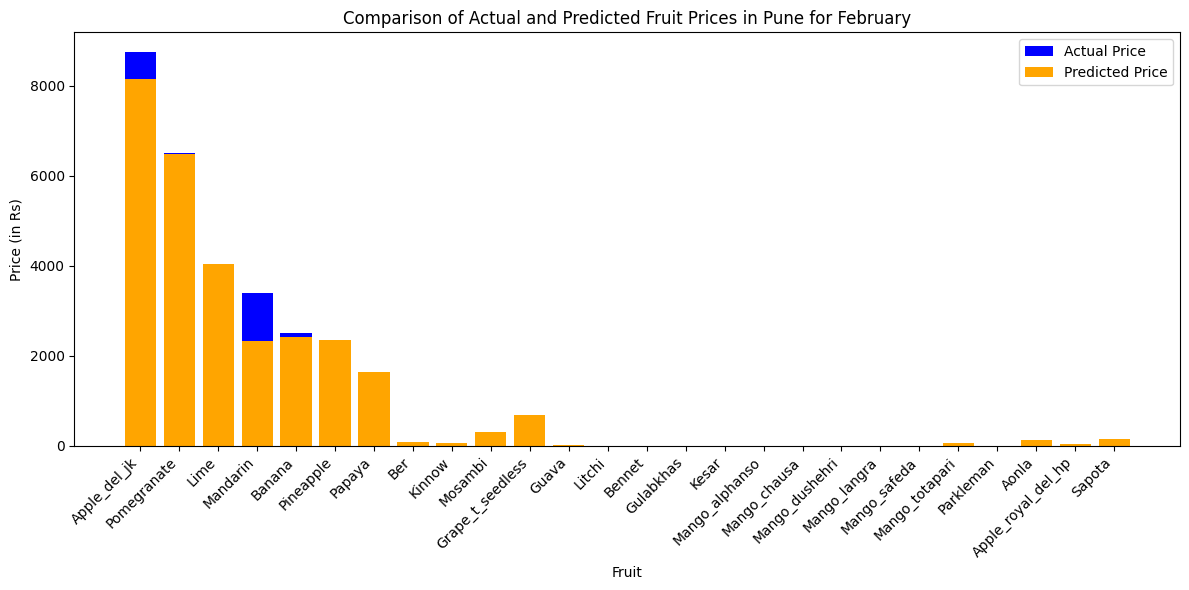

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame to get the row for the specified center and month
center = "Pune"
month = "February"
filtered_df = df[(df["Centername"] == center) & (df["Month"] == month)]

# Get the list of actual fruit prices for the specified center and month
actual_fruit_prices = dict(filtered_df.iloc[0][2:])

# Sort the actual fruit prices in descending order
sorted_actual_fruit_prices = sorted(actual_fruit_prices.items(), key=lambda x: x[1], reverse=True)

# Create the sample input
sample_input = np.array([[month, center]])

# Make a prediction using the trained model
prediction = pipeline.predict(sample_input)[0]

# Create a dictionary to store the predicted prices for each fruit
predicted_fruit_prices = dict(zip(fruit_columns, prediction))

# Sort the predicted fruit prices in descending order
sorted_predicted_fruit_prices = sorted(predicted_fruit_prices.items(), key=lambda x: x[1], reverse=True)

# Create a pandas DataFrame for the actual fruit prices
actual_df = pd.DataFrame(sorted_actual_fruit_prices, columns=['Fruit', 'Actual Price'])

# Create a pandas DataFrame for the predicted fruit prices
predicted_df = pd.DataFrame(sorted_predicted_fruit_prices, columns=['Fruit', 'Predicted Price'])

# Merge the actual and predicted DataFrames
merged_df = actual_df.merge(predicted_df, on='Fruit')

# Create a combined bar chart
plt.figure(figsize=(12, 6))
plt.bar(merged_df['Fruit'], merged_df['Actual Price'], color='blue', label='Actual Price')
plt.bar(merged_df['Fruit'], merged_df['Predicted Price'], color='orange', label='Predicted Price')
plt.title(f'Comparison of Actual and Predicted Fruit Prices in {center} for {month}')
plt.xlabel('Fruit')
plt.ylabel('Price (in Rs)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [21]:
center = "Pune"
month = "March"

c:\Users\Omkar Khade\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\Omkar Khade\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\Omkar Khade\AppData\Local\Temp\ipykernel_16564\2948853680.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(merged_df['Fruit'], rotation=45, ha='right')


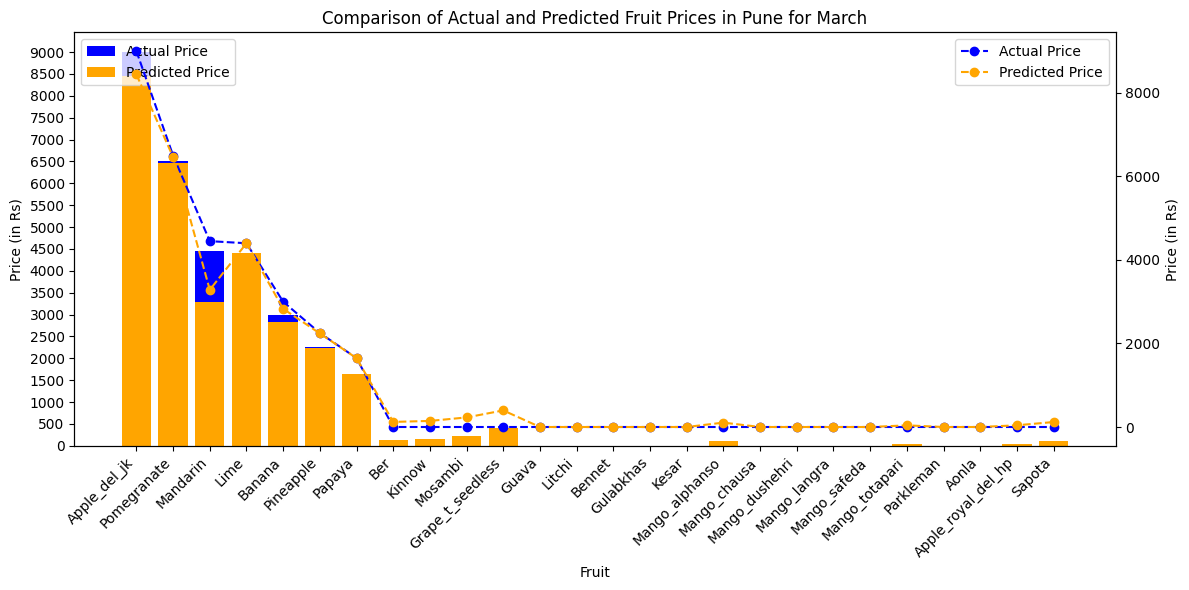

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame to get the row for the specified center and month

filtered_df = df[(df["Centername"] == center) & (df["Month"] == month)]

# Get the list of actual fruit prices for the specified center and month
actual_fruit_prices = dict(filtered_df.iloc[0][2:])

# Sort the actual fruit prices in descending order
sorted_actual_fruit_prices = sorted(actual_fruit_prices.items(), key=lambda x: x[1], reverse=True)

# Create the sample input
sample_input = np.array([[month, center]])

# Make a prediction using the trained model
prediction = pipeline.predict(sample_input)[0]

# Create a dictionary to store the predicted prices for each fruit
predicted_fruit_prices = dict(zip(fruit_columns, prediction))

# Sort the predicted fruit prices in descending order
sorted_predicted_fruit_prices = sorted(predicted_fruit_prices.items(), key=lambda x: x[1], reverse=True)

# Create a pandas DataFrame for the actual fruit prices
actual_df = pd.DataFrame(sorted_actual_fruit_prices, columns=['Fruit', 'Actual Price'])

# Create a pandas DataFrame for the predicted fruit prices
predicted_df = pd.DataFrame(sorted_predicted_fruit_prices, columns=['Fruit', 'Predicted Price'])

# Merge the actual and predicted DataFrames
merged_df = actual_df.merge(predicted_df, on='Fruit')

# Set the y-axis ticks to show prices with a gap of 1000
y_ticks = np.arange(0, max(merged_df['Actual Price'].max(), merged_df['Predicted Price'].max()) + 500, 500)

# Create a combined bar and line chart
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(merged_df['Fruit'], merged_df['Actual Price'], color='blue', label='Actual Price')
ax1.bar(merged_df['Fruit'], merged_df['Predicted Price'], color='orange', label='Predicted Price')
ax1.set_title(f'Comparison of Actual and Predicted Fruit Prices in {center} for {month}')
ax1.set_xlabel('Fruit')
ax1.set_ylabel('Price (in Rs)')
ax1.set_xticklabels(merged_df['Fruit'], rotation=45, ha='right')
ax1.set_yticks(y_ticks)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(merged_df['Fruit'], merged_df['Actual Price'], color='blue', linestyle='dashed', label='Actual Price',marker ='o')
ax2.plot(merged_df['Fruit'], merged_df['Predicted Price'], color='orange', linestyle='dashed', label='Predicted Price',marker ='o')
ax2.set_ylabel('Price (in Rs)')

ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


c:\Users\Omkar Khade\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\Omkar Khade\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\Omkar Khade\AppData\Local\Temp\ipykernel_16564\1721054231.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(merged_df['Fruit'], rotation=45, ha='right')


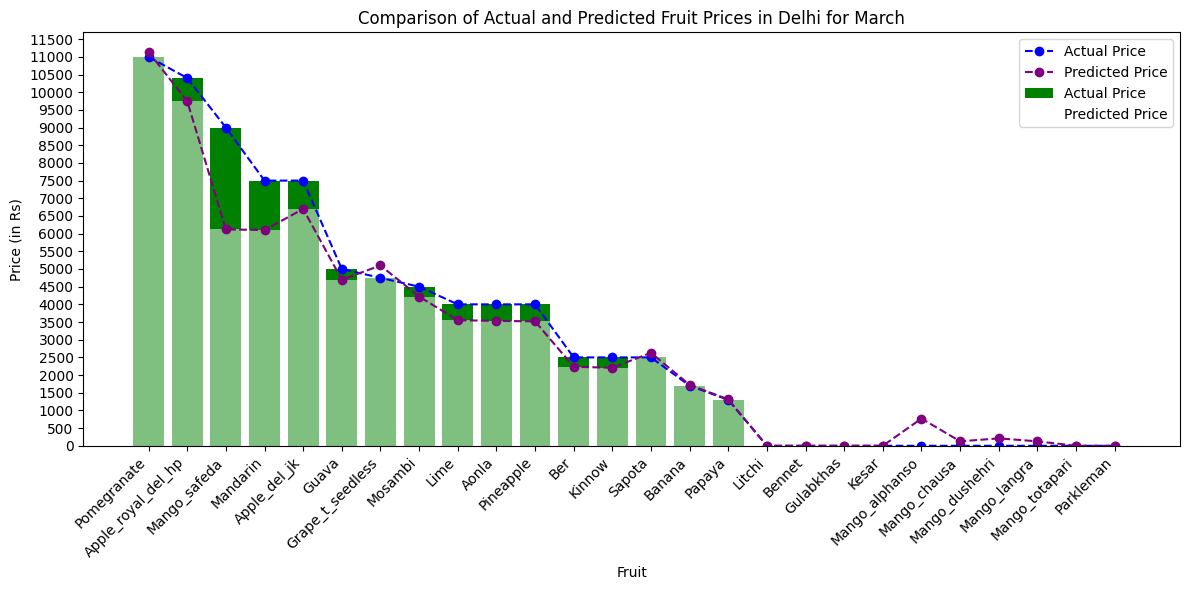

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame to get the row for the specified center and month
center = "Delhi"
month = "March"
filtered_df = df[(df["Centername"] == center) & (df["Month"] == month)]

# Get the list of actual fruit prices for the specified center and month
actual_fruit_prices = dict(filtered_df.iloc[0][2:])

# Sort the actual fruit prices in descending order
sorted_actual_fruit_prices = sorted(actual_fruit_prices.items(), key=lambda x: x[1], reverse=True)

# Create the sample input
sample_input = np.array([[month, center]])

# Make a prediction using the trained model
prediction = pipeline.predict(sample_input)[0]

# Create a dictionary to store the predicted prices for each fruit
fruit_columns = df.columns[2:]
predicted_fruit_prices = dict(zip(fruit_columns, prediction))

# Sort the predicted fruit prices in descending order
sorted_predicted_fruit_prices = sorted(predicted_fruit_prices.items(), key=lambda x: x[1], reverse=True)

# Create a pandas DataFrame for the actual fruit prices
actual_df = pd.DataFrame(sorted_actual_fruit_prices, columns=['Fruit', 'Actual Price'])

# Create a pandas DataFrame for the predicted fruit prices
predicted_df = pd.DataFrame(sorted_predicted_fruit_prices, columns=['Fruit', 'Predicted Price'])

# Merge the actual and predicted DataFrames
merged_df = actual_df.merge(predicted_df, on='Fruit')

# Set the y-axis ticks to show prices with a gap of 1000
y_ticks = np.arange(0, max(merged_df['Actual Price'].max(), merged_df['Predicted Price'].max()) + 500, 500)

#Create a combined bar and line chart
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(merged_df['Fruit'], merged_df['Actual Price'], color='green', label='Actual Price')
ax.plot(merged_df['Fruit'], merged_df['Actual Price'], color='blue', linestyle='dashed', label='Actual Price',marker ='o')
ax.bar(merged_df['Fruit'], merged_df['Predicted Price'], color='white', label='Predicted Price', alpha=0.5)
ax.plot(merged_df['Fruit'], merged_df['Predicted Price'], color='purple', linestyle='dashed', label='Predicted Price',marker ='o')
ax.set_title(f'Comparison of Actual and Predicted Fruit Prices in {center} for {month}')
ax.set_xlabel('Fruit')
ax.set_ylabel('Price (in Rs)')
ax.set_xticklabels(merged_df['Fruit'], rotation=45, ha='right')
ax.set_yticks(y_ticks)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()